In [6]:
import numpy as np
import pandas as pd


In [9]:
data = pd.read_csv('wfp_market_food_prices.csv',encoding = "ISO-8859-1")
data.head(6)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
5,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,6,2014,50.0,WFP


In [10]:
#Currency of each country
unique_coun=data.adm0_name.unique()
l=[]
for i in unique_coun:
    l.append(data.cur_name[(data.loc[data['adm0_name']==i].index[0])])
print(l)

['AFN', 'DZD', 'AMD', 'AZN', 'BDT', 'XOF', 'BTN', 'BOB', 'XOF', 'BIF', 'KHR', 'XAF', 'CVE', 'XAF', 'XAF', 'COP', 'XAF', 'USD', 'XOF', 'CDF', 'DJF', 'USD', 'ETB', 'GMD', 'GEL', 'GHS', 'GTQ', 'XOF', 'GNF', 'HTG', 'USD', 'INR', 'IDR', 'IRR', 'IQD', 'JOD', 'KES', 'KGS', 'LAK', 'LBP', 'LSL', 'LRD', 'MGA', 'MWK', 'XOF', 'MRO', 'MZN', 'MMK', 'NPR', 'XOF', 'NGN', 'PKR', 'USD', 'PEN', 'PHP', 'RWF', 'XOF', 'SOS', 'LKR', 'SZL', 'SYP', 'TJS', 'USD', 'TRY', 'UGX', 'UAH', 'TZS', 'YER', 'ZMW', 'USD', 'NIS', 'SDG', 'EGP', 'SSP']


In [11]:
#country name and currency
Coun_type=list(zip(unique_coun,l))


In [12]:
#api for rates
import requests

# Where USD is the base currency you want to use
url = 'https://openexchangerates.org/api/latest.json?app_id=9e4a30c863734e9ba285f393936ffc4d'

# Making our request
response = requests.get(url)
JSON = response.json()

rates=JSON['rates']
rates


{'AED': 3.673014,
 'AFN': 68.659,
 'ALL': 111.485,
 'AMD': 478.51,
 'ANG': 1.779694,
 'AOA': 165.9215,
 'ARS': 17.1245,
 'AUD': 1.2473,
 'AWG': 1.796002,
 'AZN': 1.6855,
 'BAM': 1.630861,
 'BBD': 2,
 'BDT': 81.96,
 'BGN': 1.630675,
 'BHD': 0.377043,
 'BIF': 1745.75,
 'BMD': 1,
 'BND': 1.347346,
 'BOB': 6.963801,
 'BRL': 3.1346,
 'BSD': 1,
 'BTC': 0.000257019808,
 'BTN': 64.249104,
 'BWP': 10.18655,
 'BYN': 1.938209,
 'BZD': 2.015313,
 'CAD': 1.227912,
 'CDF': 1562.881563,
 'CHF': 0.960995,
 'CLF': 0.02323,
 'CLP': 625.1,
 'CNH': 6.573246,
 'CNY': 6.5708,
 'COP': 2900.44,
 'CRC': 576.345,
 'CUC': 1,
 'CUP': 25.5,
 'CVE': 92.35,
 'CZK': 21.732275,
 'DJF': 178.77,
 'DKK': 6.19372,
 'DOP': 47.206,
 'DZD': 111.245648,
 'EGP': 17.6345,
 'ERN': 15.331258,
 'ETB': 23.34271,
 'EUR': 0.832352,
 'FJD': 2.005257,
 'FKP': 0.739242,
 'GBP': 0.739242,
 'GEL': 2.4724,
 'GGP': 0.739242,
 'GHS': 4.437942,
 'GIP': 0.739242,
 'GMD': 45.96,
 'GNF': 8956.35,
 'GTQ': 7.292161,
 'GYD': 207.965,
 'HKD': 7.8042

In [13]:
#unique commodities in india
india=data[data['adm0_name'].str.contains("India")]
v=india.cm_name.unique()

In [14]:
#min of each country rates
from functools import reduce
from math import isnan
y=data.loc[data['pt_name']=='Retail'].index.values
z=data.loc[data['cm_name']=='Wheat'].index.values
l={}
for i in unique_coun:
    x=data.loc[data['adm0_name']==i].index.values
    result=reduce(set.intersection, map(set, [x,y,z]))
    avg=((data.loc[result, ['mp_price']].min())).values
    l[i]=avg[0]

clean_dict = {k: l[k] for k in l if not isnan(l[k])}  
print(clean_dict)    
    

{'Afghanistan': 5.0, 'Ethiopia': 1.7353000000000001, 'Guinea-Bissau': 300.0, 'India': 3.7999999999999998, 'Indonesia': 4328.2592000000004, 'Kyrgyzstan': 9.5, 'Mauritania': 80.25, 'Nepal': 11.0, 'Pakistan': 29.75, 'Rwanda': 208.75, 'Tajikistan': 0.14829999999999999, 'Yemen': 50.0, 'Zimbabwe': 0.40000000000000002, 'Sudan': 0.83499999999999996}


In [15]:
#Country and average retail rate to be multiplied by
coun_fact={}
for x,y in Coun_type:
    for key,value in clean_dict.items():
        if x==key:
            coun_fact[y]=value
print(coun_fact)            

{'AFN': 5.0, 'ETB': 1.7353000000000001, 'XOF': 300.0, 'INR': 3.7999999999999998, 'IDR': 4328.2592000000004, 'KGS': 9.5, 'MRO': 80.25, 'NPR': 11.0, 'PKR': 29.75, 'RWF': 208.75, 'TJS': 0.14829999999999999, 'YER': 50.0, 'USD': 0.40000000000000002, 'SDG': 0.83499999999999996}


In [25]:
Coun_name_rate={}
for x,y in Coun_type:
    for k,v in rates.items():
        if y==k:
            Coun_name_rate[x]=v
print(Coun_name_rate)
            

{'Afghanistan': 68.659, 'Algeria': 111.245648, 'Armenia': 478.51, 'Azerbaijan': 1.6855, 'Bangladesh': 81.96, 'Benin': 545.986989, 'Bhutan': 64.249104, 'Bolivia': 6.963801, 'Burkina Faso': 545.986989, 'Burundi': 1745.75, 'Cambodia': 4056.3, 'Cameroon': 545.986989, 'Cape Verde': 92.35, 'Central African Republic': 545.986989, 'Chad': 545.986989, 'Colombia': 2900.44, 'Congo': 545.986989, 'Costa Rica': 1, "Cote d'Ivoire": 545.986989, 'Democratic Republic of the Congo': 1562.881563, 'Djibouti': 178.77, 'El Salvador': 1, 'Ethiopia': 23.34271, 'Gambia': 45.96, 'Georgia': 2.4724, 'Ghana': 4.437942, 'Guatemala': 7.292161, 'Guinea-Bissau': 545.986989, 'Guinea': 8956.35, 'Haiti': 62.998, 'Honduras': 1, 'India': 64.27, 'Indonesia': 13260.49124, 'Iran  (Islamic Republic of)': 33337.5, 'Iraq': 1167.8, 'Jordan': 0.709001, 'Kenya': 103.295, 'Kyrgyzstan': 68.443862, "Lao People's Democratic Republic": 8282.45, 'Lebanon': 1507.95, 'Lesotho': 13.297494, 'Liberia': 117.195793, 'Madagascar': 2989.4, 'Malawi

In [26]:
#convert in usd
cost_usd={}
for k,v in clean_dict.items():
    for x,y in Coun_name_rate.items():
        if k==x:
            cost_usd[k]=y*v
print(cost_usd)
#multiply the export cost

{'Afghanistan': 343.29500000000002, 'Ethiopia': 40.506604663000005, 'Guinea-Bissau': 163796.09669999999, 'India': 244.22599999999997, 'Indonesia': 57394843.206049412, 'Kyrgyzstan': 650.21668899999997, 'Mauritania': 29290.098412500003, 'Nepal': 1131.46, 'Pakistan': 3134.9944587499999, 'Rwanda': 176367.65625, 'Tajikistan': 1.3055600880999998, 'Yemen': 12514.0821, 'Zimbabwe': 0.40000000000000002, 'Sudan': 5.5739523200000001}


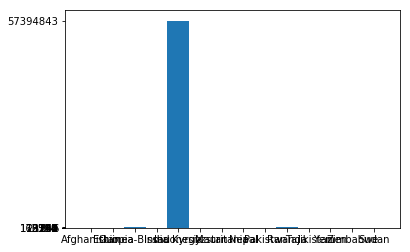

In [36]:
import matplotlib.pyplot as plt

top=cost_usd.items()

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1


plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.show()

In [44]:

#travelling cost per kilo meter
cost=.05
final_cost={}
# Making our request
# Where USD is the base currency you want to use
for k,v in cost_usd.items():
    s='http://www.distance24.org/route.json?stops=India|'+k
    
    url = s
    response = requests.get(url)
    JSON = response.json()

    distance=JSON['distance']
   
    final_cost[k]=distance*cost + v
print(final_cost)


{'Afghanistan': 435.995, 'Ethiopia': 256.45660466300001, 'Guinea-Bissau': 164295.34669999999, 'India': 244.22599999999997, 'Indonesia': 57395067.75604941, 'Kyrgyzstan': 766.66668900000002, 'Mauritania': 29757.448412500002, 'Nepal': 1182.1600000000001, 'Pakistan': 3207.7444587499999, 'Rwanda': 176663.15625, 'Tajikistan': 109.4555600881, 'Yemen': 12677.382099999999, 'Zimbabwe': 350.25, 'Sudan': 268.07395231999999}
